
### Reference: [Markov Logic Network MC-SAT (using pracmln library)](https://kaivalyar.github.io/gsoc18-pracmln/posts/mln-inference/)

#### UML pracmln
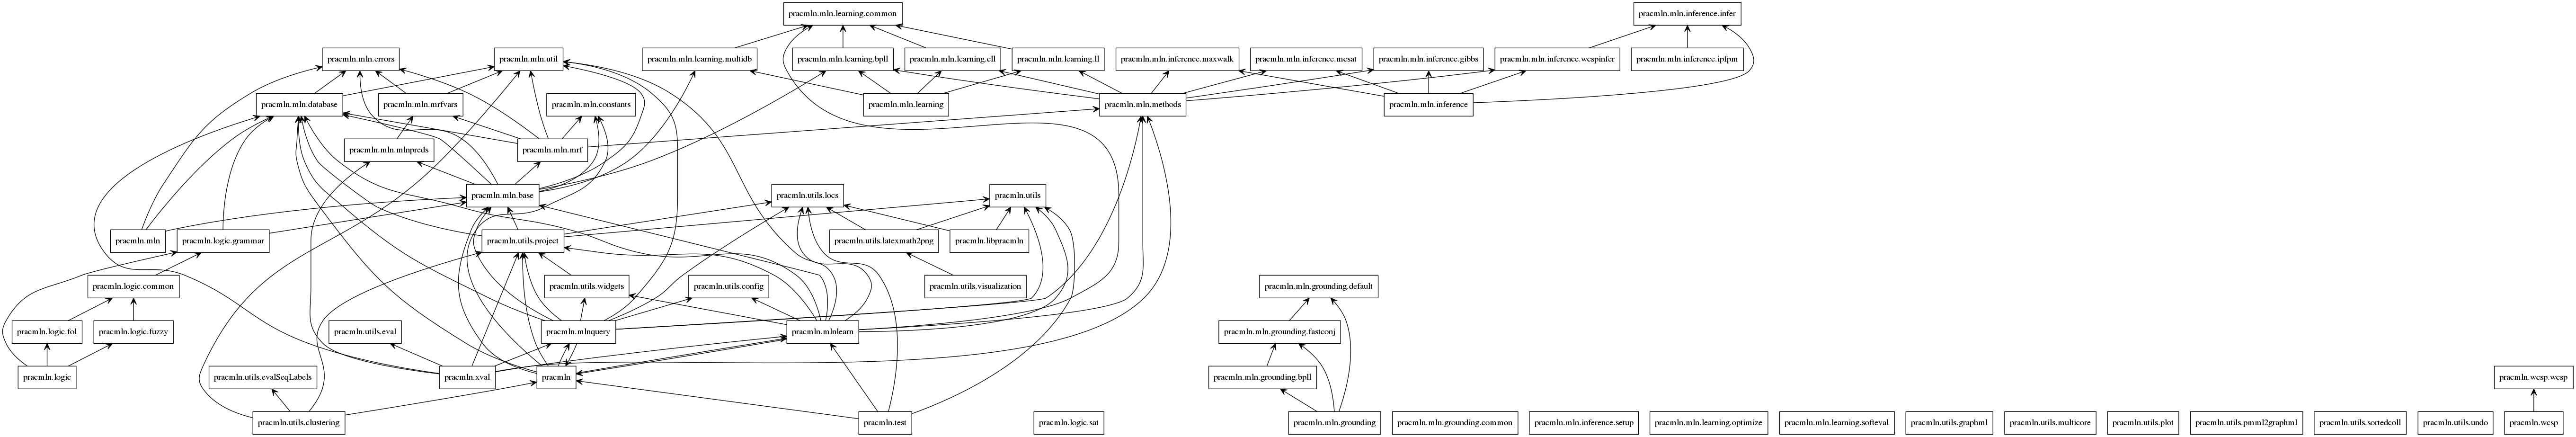

#### MC Satisfiability based Inference for Smokes, cancer and Friends network example

In [ ]:
import numpy as np
import pandas as pd
import os
import os.path
import pystan
from scipy.optimize import minimize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/
%cd MyDrive/Colab Notebooks/
%cd mln\ \(1\)

/content/drive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/mln (1)


In [ ]:
!ls

pracmln  probcog  probcog.zip  test.csv  train.csv


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mln (1)/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mln (1)/test.csv")
train.columns= ['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Gender', 'SmokingStatus']
test.columns= ['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Gender', 'SmokingStatus']

In [ ]:
train.info(), train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Gender         1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


(None,
 Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Gender', 'SmokingStatus'], dtype='object'))

In [ ]:
train.head()

,Patient,Weeks,FVC,Percent,Age,Gender,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [ ]:

if len(test)==5:
    test['Patient'] = test['Patient'] + "_t" # This ensures in development situation test patients are treated differently than in same record for train patients

test2 = test[['Patient', 'Age', 'Gender', 'SmokingStatus']].merge(pd.DataFrame([(Patient, np.int(Weeks)) for Weeks in range(-12,134) for Patient in set(test['Patient'])],
                        columns=['Patient', 'Weeks']), 
           on="Patient", how="left")

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
test2['fold'] = 0

train = train.append(test).reset_index(drop=True)
train['fold'] = 1

train = train.append(test2).reset_index(drop=True)

In [ ]:
!sudo apt-get install python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
#!git clone https://github.com/danielnyga/pracmln.git
%cd pracmln/
!python3 setup.py install

/content/drive/My Drive/Colab Notebooks/mln (1)/pracmln
/usr/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'install_requires'
  warnings.warn(msg)
/usr/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'entry_points'
  warnings.warn(msg)
running install
running build
running build_py
running install_lib
running install_data
running install_egg_info
Removing /usr/local/lib/python3.7/dist-packages/pracmln-1.2.3.egg-info
Writing /usr/local/lib/python3.7/dist-packages/pracmln-1.2.3.egg-info


In [ ]:
!python3 setup.py install
! echo $PYTHONPATH

import os
os.environ['PYTHONPATH'] += ":/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/python3/"

! echo $PYTHONPATH

/usr/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'install_requires'
  warnings.warn(msg)
/usr/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'entry_points'
  warnings.warn(msg)
running install
running build
running build_py
running install_lib
running install_data
running install_egg_info
Removing /usr/local/lib/python3.7/dist-packages/pracmln-1.2.3.egg-info
Writing /usr/local/lib/python3.7/dist-packages/pracmln-1.2.3.egg-info
/env/python:/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/python3/:/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/python3/
/env/python:/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/python3/:/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/python3/:/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/python3/


In [ ]:
import pracmln

In [ ]:
import os
os.path.exists('/usr/local/share/pracmln/3rdparty/toulbar2-0.9.7.0/x86_64/Linux/toulbar2')

True

In [ ]:
import sys
sys.stdout.echo

In [ ]:
import pracmln
from pracmln import MLN


In [ ]:
import timeit
import sys
import os
import time
from pracmln import query
from pracmln import MLN, Database, query

pth = os.path.join("/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/examples/smokers/mlns/", 
                   'wts.pybpll.smoking-train-smoking.mln')
print(os.path.exists(pth))
mln = MLN(mlnfile=pth, grammar='StandardGrammar')
pth = os.path.join("/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/examples/smokers/dbs/", 'smoking-test-smaller.db')
db = Database(mln, dbfile=pth)
with open(os.path.join("/content/drive/MyDrive/Colab Notebooks/mln (1)/pracmln/examples/smokers/", 'performance.txt'), 'a') as fl:
      
  start = time.time()
  #t = 1000* timeit.timeit("test(False)", setup="from __main__ import test, set; set()", number=10)
  query(queries='Cancer,Smokes,Friends', method='MC-SAT', mln=mln, db=db, verbose=False, multicore=True).run()
  t1 = time.time()-start
  #print('single core exact inference test: {}'.format(t))
  #fl.write(str(t))
  #fl.write('\t(SingleCore)\n')
  start = time.time()
  #t = 1000* timeit.timeit("test(True)", setup="import test, set; set()", number=10)
  query(queries='Cancer,Smokes,Friends', method='MC-SAT', mln=mln, db=db, verbose=False, multicore=False).run()
  t2 = time.time()-start
  #print('multi core exact inference test: {}'.format(t2))
  print('Inference, MC-SAT, {}, {}'.format(t1, t2))
  fl.write(str(t1)+str(t2))
  fl.write('\t(Inference, MC-SAT)\n')
        
    

True


Inference, MC-SAT, 0.38447141647338867, 0.4017677307128906
